In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
iris = pd.read_excel("Iris.xls")

In [4]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


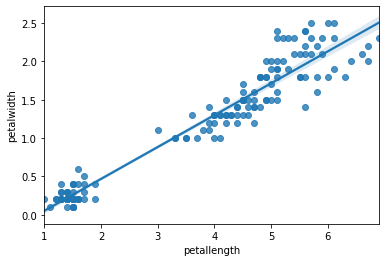

In [5]:
sb.regplot(data = iris, x = 'petallength', y = 'petalwidth')
plt.show()

In [10]:
petalwidth = iris [['petalwidth']]
inputs.head()

,petalwidth
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [11]:
petallength = iris [['petallength']]
outputs.head()

,petallength
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


In [14]:

from sklearn.model_selection import train_test_split

In [16]:
#chia du lieu
X_train, X_test, y_train, y_test = train_test_split(petalwidth, petallength, test_size = 0.2)


In [18]:
from sklearn.neighbors import KNeighborsRegressor


In [40]:
#neu nhu co mot so k co socre = nhau ->tim mse cua cac k = nhau
#mse << nho nhat -> chon k do 
list_k = []
list_r_score = []
n = int((y_train.shape[0]**0.5)/2)+ 1
for K_value in range(2, n ): #K_value = 2->7
    list_k.append(K_value)
    neigh = KNeighborsRegressor(n_neighbors = K_value)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test) * 100
    list_r_score.append(score)
    print("The r^2 score is:", score, " for K-values", K_value)
    
vi_tri = list_r_score.index(max(list_r_score))
k = list_k[vi_tri]

print("\nThe optimal number of neighbors is ", k, " with R^2 score is: ", list_r_score[vi_tri])
    

The r^2 score is: 92.34188098437369  for K-values 2
The r^2 score is: 93.00172164120747  for K-values 3
The r^2 score is: 93.49118611578324  for K-values 4
The r^2 score is: 94.88757129567857  for K-values 5
The r^2 score is: 95.20179952746221  for K-values 6
The r^2 score is: 95.23254045705556  for K-values 7
The r^2 score is: 95.51685843285756  for K-values 8
The r^2 score is: 95.49155286793453  for K-values 9

The optimal number of neighbors is  8  with R^2 score is:  95.51685843285756


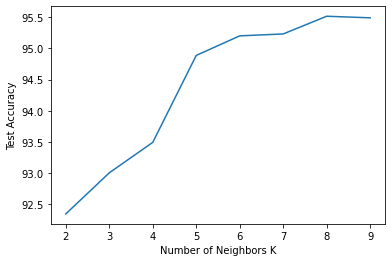

In [41]:
plt.plot(list_k, list_r_score)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Test Accuracy")
plt.show()

In [32]:
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [35]:
#kiem tra du lieu
y_predict = knn.predict(X_test)
y_predict[:5]

array([[1.45      ],
       [4.66666667],
       [4.16666667],
       [5.35      ],
       [1.58333333]])

In [36]:
print("The training R^2 score: is: ", knn.score(X_train, y_train))
print("The testting R^2 score: is: ", knn.score(X_test, y_test))

The training R^2 score: is:  0.9557627458107743
The testting R^2 score: is:  0.9520179952746222


In [37]:
from sklearn.metrics import mean_squared_error

In [44]:
#the mean square error
print("The mean square error : ", mean_squared_error(y_test, y_predict))


The mean square error :  0.1702129629629629


In [46]:
x_now = [[4.5]]
y_now = knn.predict(x_now)
y_now

array([[5.53333333]])

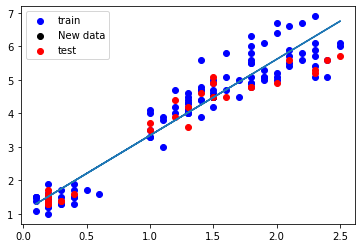

In [20]:
plt.scatter(x=X_train, y = y_train, color = 'blue', label= 'train')
plt.scatter(x=x_now, y = y_now, color = 'black', label= 'New data')
plt.scatter(x=X_test, y = y_test, color = 'red', label= 'test')
plt.plot(inputs,regline)
plt.legend()
plt.show()